

# Pima Indians Diabetes Dataset


<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
 0 in df.values

True

In [6]:
df.info()
(df == 0).astype(int).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
#As Issulin has 374 zero values and that is not applicable with reality 
df.drop('Insulin',axis=1, inplace= True)
df.shape

(768, 8)

In [11]:
#BMi measures cannot have zero values
df.drop(df.index[df['BMI'] == 0], inplace = True)
df.drop(df.index[df['BloodPressure'] == 0], inplace = True)
df.drop(df.index[df['Glucose'] == 0], inplace = True)
df.shape

(724, 7)

In [13]:
#As Issulin has 227 zero values and that is not applicable with reality 
df.drop('SkinThickness',axis=1, inplace= True)
df.shape
(df == 0).astype(int).sum()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### what is the highest correlations between outcome and the other fields

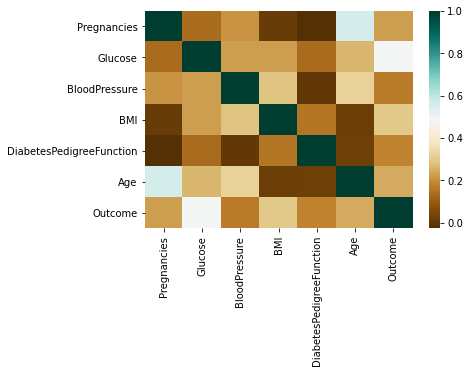

In [14]:
# there is high correlation between glucose and outcome
#and BMI and outcome
g = sns.heatmap(df.corr(),cmap="BrBG",annot=False)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

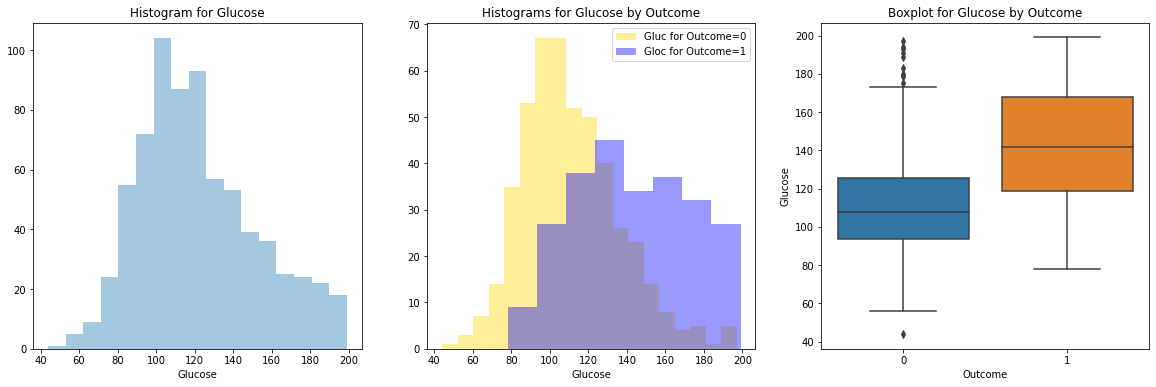

In [15]:
#Clearly diabetic group has higher glucose than non-diabetic.
#as the means clearly are not overlapping there is clearly a correlation between Glucose and outcome
df1 = df[df.Outcome==1]
df0 = df[df.Outcome==0]
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(df.Glucose, kde=False)
plt.subplot(1,3,2)
sns.distplot(df0.Glucose,kde=False,color="Gold", label="Gluc for Outcome=0")
sns.distplot(df1.Glucose, kde=False, color="Blue", label = "Gloc for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome,y=df.Glucose)
plt.title("Boxplot for Glucose by Outcome")

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

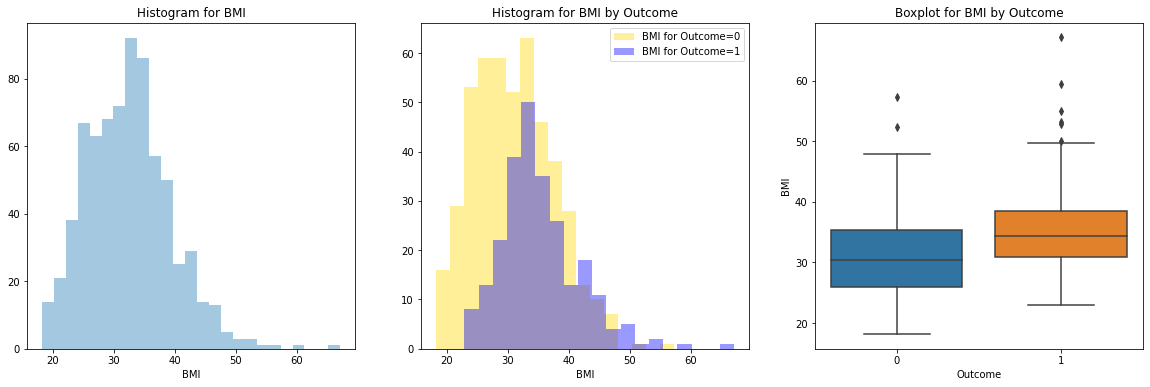

In [16]:
#There are few outliers. Few are obese in the datase
#Diabetic people seems to be only higher side of BMI
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(df.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(df0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(df1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=df.Outcome, y=df.BMI)
plt.title("Boxplot for BMI by Outcome")

## positive linear relationship (BMI and skinthickness, pregnacies and age) 

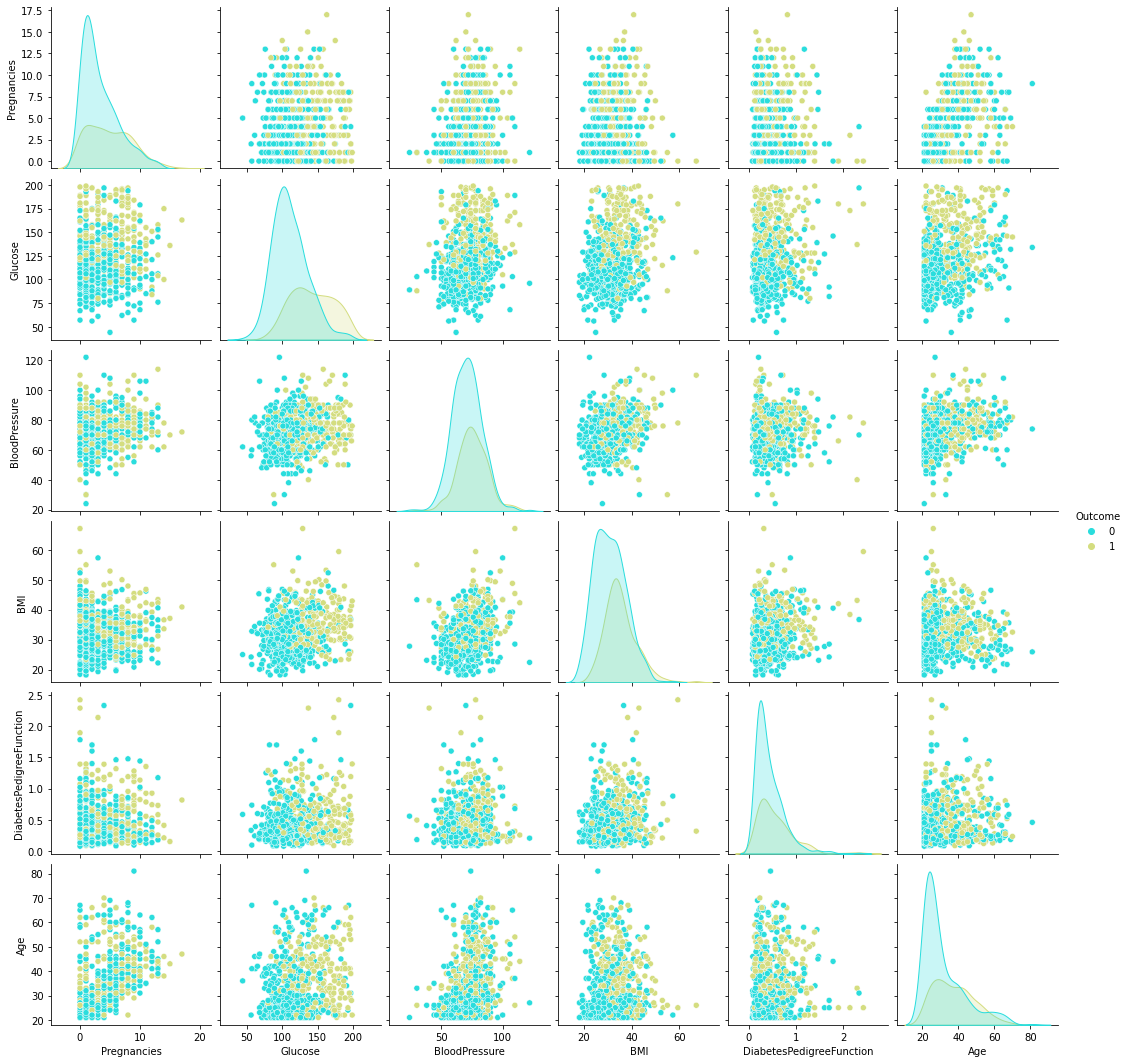

In [17]:
#From scatter plots, BMI & SkinThickness and Pregnancies & Age seem to have positive linear relationships
sns.pairplot(df,hue= 'Outcome',palette='rainbow')

<a id='pre'></a>
## Build a Prediction Model


In [18]:
# Make a feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:6])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.635022,0.849933,-0.032378,0.164562,0.458421,1.416075
1,-0.852861,-1.200262,-0.517370,-0.852262,-0.372691,-0.199947
2,1.230175,1.988930,-0.679035,-1.331622,0.593928,-0.114893
3,-0.852861,-1.070091,-0.517370,-0.634371,-0.926765,-1.050485
4,-1.150438,0.491962,-2.619006,1.544537,5.460146,-0.029839


In [19]:
# Split the data into train and test data
from sklearn.model_selection import train_test_split
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.3, random_state=42)

## Using DT

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
dtree = DecisionTreeClassifier()
dtree= dtree.fit(X_train,y_train)
dt_predict = dtree.predict(X_test)

In [22]:
print(confusion_matrix(y_test, dt_predict))
print("\n")
print(classification_report(y_test, dt_predict))

[[119  30]
 [ 33  36]]


              precision    recall  f1-score   support

           0       0.78      0.80      0.79       149
           1       0.55      0.52      0.53        69

    accuracy                           0.71       218
   macro avg       0.66      0.66      0.66       218
weighted avg       0.71      0.71      0.71       218



## Using RF

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc = rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))
print("\n")
print(classification_report(y_test, rfc_pred))

[[130  19]
 [ 32  37]]


              precision    recall  f1-score   support

           0       0.80      0.87      0.84       149
           1       0.66      0.54      0.59        69

    accuracy                           0.77       218
   macro avg       0.73      0.70      0.71       218
weighted avg       0.76      0.77      0.76       218



In [25]:
from sklearn.model_selection import  KFold,GridSearchCV

In [26]:
seed = 4
rf = RandomForestClassifier(random_state=seed)
kf = KFold(n_splits=5 , shuffle=False)
params = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [ 6, 8, 10],
    'max_features': ['log2'],
}
grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1)
grid_no_up.fit(X_train, y_train)
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_no_up.best_params_
print('Best hyerparameters:\n' , best_hyperparams)
# Extract best CV score from 'grid_dt'
best_CV_score = grid_no_up.best_score_
print('Best CV accuracy')
print(best_CV_score)
# Extract best model from 'grid_dt'
best_model = grid_no_up.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyerparameters:
 {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 75}
Best CV accuracy
0.7589205979421472


In [27]:
rfc2 =  RandomForestClassifier(n_estimators = 75, max_depth =  10, max_features = 'log2' )
rfc2.fit(X_train,y_train)
pred = rfc2.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[129  20]
 [ 29  40]]


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       149
           1       0.67      0.58      0.62        69

    accuracy                           0.78       218
   macro avg       0.74      0.72      0.73       218
weighted avg       0.77      0.78      0.77       218



In [28]:
df['Outcome'].value_counts()

0    475
1    249
Name: Outcome, dtype: int64

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


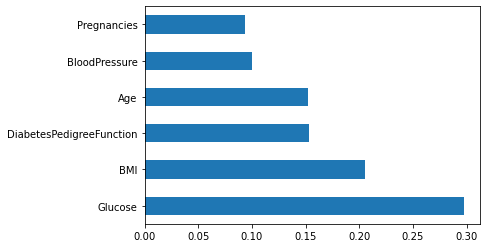

In [29]:
feat_importances = pd.Series(rfc.feature_importances_, index=list(df.columns[:6]))
feat_importances.nlargest(25).plot(kind='barh')
print(feat_importances.index)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
lr_predict = logmodel.predict(X_test)

In [31]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.83       149
           1       0.66      0.55      0.60        69

    accuracy                           0.77       218
   macro avg       0.73      0.71      0.72       218
weighted avg       0.76      0.77      0.76       218



## Using KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [33]:
print(confusion_matrix(y_test,knn_predict))
print(classification_report(y_test,knn_predict))

[[120  29]
 [ 34  35]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       149
           1       0.55      0.51      0.53        69

    accuracy                           0.71       218
   macro avg       0.66      0.66      0.66       218
weighted avg       0.71      0.71      0.71       218



## Choosing a K value

In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

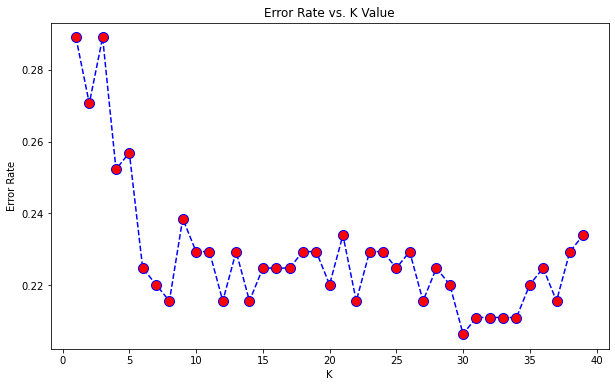

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,knn_predict))
print('\n')
print(classification_report(y_test,knn_predict))

WITH K=30


[[134  15]
 [ 30  39]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       149
           1       0.72      0.57      0.63        69

    accuracy                           0.79       218
   macro avg       0.77      0.73      0.75       218
weighted avg       0.79      0.79      0.79       218



## Using Support Vector Machines

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
svm_predict = model.predict(X_test)

In [38]:
print(confusion_matrix(y_test,svm_predict))
print(classification_report(y_test,svm_predict))

[[131  18]
 [ 26  43]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       149
           1       0.70      0.62      0.66        69

    accuracy                           0.80       218
   macro avg       0.77      0.75      0.76       218
weighted avg       0.79      0.80      0.79       218



In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_
grid.best_estimator_

SVC(C=0.1, gamma=0.1)

In [41]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[133  16]
 [ 33  36]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       149
           1       0.69      0.52      0.60        69

    accuracy                           0.78       218
   macro avg       0.75      0.71      0.72       218
weighted avg       0.77      0.78      0.77       218

